# An Image Class

In this lab we are going to generate a class to represent an image.  We will use this class to allow us to do simple image generation and write the images to disk.

The pixel data will be held in a simple numpy array, and we will use the `PIL` library to write the image to disk.

The class will have the following attributes

- `width` : the width of the image
- `height` : the height of the image
- `pixels` : a numpy array of shape `(height, width, 3)` where the last dimension represents the red, green and blue channels.

We will have the following methods

- `__init__(self, width, height)` : to create a new image
- `set_pixel(self, x, y, color)` : to set the pixel at `(x, y)` to the color
- `save(self, filename)` : to write the image to disk
- `load(self, filename)` : to load an image from disk
- `display(self)` : to display the image in the notebook
- `clear(self, color)` : to set all the pixels to the color

To start with we will import the  python libraries we need, in this case `numpy` and `PIL`.


In [36]:
# write code here

from PIL import Image as PILImage
import numpy as np


The first thing we need to think about is how we typically layout and image. At it's simplest level we can say an image is a collection of pixels with the origin at 0,0 in the top left corner.  The x axis increases as we move to the right and the y axis increases as we move down.  This is the typical way we layout images in computer graphics.

We can represent the image as a 3D numpy array, where the first dimension is the y axis, the second dimension is the x axis and the third dimension is the color channel.  We will use the convention that the color channels are in the order red, green, blue.

Each of the red,green, and blue channels will be an integer between 0 and 255.  This is a typical and simple way to represent color in computer graphics.  We will use a tuple of three integers to represent the color, `(r, g, b)`.

## [numpy.array](https://numpy.org/doc/1.26/reference/generated/numpy.array.html)

We will look at numpy in more detail in [this lecture](https://nccastaff.bournemouth.ac.uk/jmacey/SEForMedia/lectures/Lecture5/) for now we are going to just use the np.array class to hold the pixel data. 

The following code demonstrates how we can create a simple array and access the data

In [37]:
width = 3
height = 2
pixels = np.zeros((height, width, 3), dtype=np.uint8)
pixels[0, 0] = [255, 0, 0]  # red
pixels[0, 1] = [0, 255, 0]  # green
pixels[0, 2] = [0, 0, 255]  # blue
print(pixels)

[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]]]



In this example we are creating an image of width 3 and height 2, and setting each element to be a zero of type uint8.  We then set the pixel at 0,0 to be red, 0,1 to be green and 0,2 to be blue.  

The 2nd row is defaulted to black as we have not set the pixel values.

As you can see we can address each pixel by it's x and y coordinates using the array indexing.  We can also address the color channels using the third dimension.  In this case 0 is red, 1 is green and 2 is blue.

Whilst it is typical for us to use x,y coordinates to address pixels, numpy uses the opposite convention.  The first dimension is the y axis and the second dimension is the x axis.  This is a common source of confusion when working with numpy array and we can design around this later in the lab when we implement the `set_pixel` method.

We can also set every element in the array to a single value using the `fill` method.  This is useful when we want to clear the image to a single color.



In [38]:
width = 100
height = 100

pixels=np.full((width,height,3),(255,0,0),dtype=np.uint8) # red

We can save this image to disk using the PIL library.  We can create a PIL image from a numpy array using the `Image.fromarray` method.  We can then save the image to disk using the `save` method.  The following code demonstrates how we can save the image to disk.

In [39]:
img = PILImage.fromarray(pixels)
img.save('red.png')


There are two methods to display an image in a Jupyter notebook, in markdown we can refer to the file we have saved using the ```![alt text](path)``` tag so the code ```![red](red.png)``` used below will display our image. 

![alt text](red.png)

Alternatively we can use the `IPython.display` module to display the image in the notebook.  The following code demonstrates how we can display the image in the notebook.



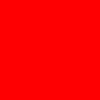

In [40]:
# show the image in the notebook
from IPython.display import Image as IPImage
IPImage(filename='red.png') 

### Matplotlib

There is another library that is often used to display images in Jupyter notebooks called `matplotlib`.  We can use the `imshow` method to display the image.  The following code demonstrates how we can display the image using `matplotlib`. We will investigate matplotlib in a later lab as well. 



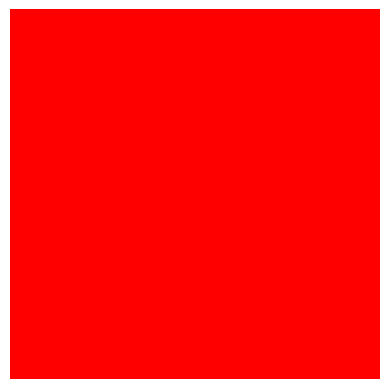

In [41]:
import matplotlib.pyplot as plt
# only show image not axis
plt.axis('off')
plt.imshow(img)
plt.show(img)

# A Simple Image Class

We now have enough information to start designing our image class. Typically when designing a class we would develop it in a separate file and then import it into our notebook.  This makes it easier to test and debug the class.  We will develop the class in the notebook for simplicity. However be warned that each time you make changes you will need to re-run the class definition to update the class. This is not ideal but is fine for simple classes like this one.

We can also use the run all command to ensure that the class is up to date.



In [60]:
## write a class to create images
class Image:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.pixels = np.zeros((height, width, 3), dtype=np.uint8)
        
    def set_pixel(self, x, y, color):
        self.pixels[y, x] = color
        
    def save(self, filename):
        img = PILImage.fromarray(self.pixels)
        img.save(filename)
        
    def display(self):
        plt.axis('off')
        img = PILImage.fromarray(self.pixels)
        plt.imshow(img)
        plt.show(img)

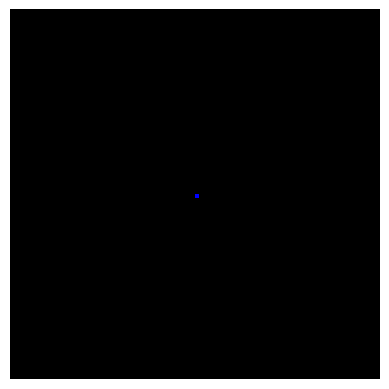

In [63]:
image=Image(100,100)
image.set_pixel(50,50,(0,0,255))
image.save('blue.png')
image.display()

This works well, but we could improve it more. For example when constructing an image at present the background is black.  It would be better if we could specify the background color when we create the image.  We can do this by adding a new parameter to the `__init__` method.  We can also add a method to set all the pixels to a single color.  The following code demonstrates how we can do this.

In [69]:
# Copy the image class from previous cell and expand to add the init method

## write a class to create images
class Image:
    def __init__(self, width, height, colour=(255,255,255)):
        self.width = width
        self.height = height
        self.pixels = np.full((height, width, 3), colour,dtype=np.uint8)
        
    def set_pixel(self, x, y, color):
        self.pixels[y, x] = color
        
    def save(self, filename):
        img = PILImage.fromarray(self.pixels)
        img.save(filename)
        
    def display(self):
        plt.axis('off')
        img = PILImage.fromarray(self.pixels)
        plt.imshow(img)
        plt.show(img)

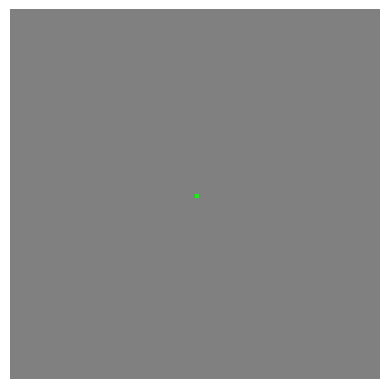

In [72]:
image=Image(100,100,(128,128,128))
image.set_pixel(50,50,(0,255,0))
image.save('green.png')
image.display()

In this example we can now set the background colour, however we have not yet implemented the `clear` method.  It makes sense to write this then use it in the ```__init__``` method to set the background color as this reduces code duplications.

In [ ]:
# copy the previous class and add the method and expand 

# Copy the image class from previous cell and expand to add the init method

## write a class to create images
class Image:
    def __init__(self, width, height, colour=(255,255,255)):
        self.width = width
        self.height = height
        self.clear(colour)

    def clear(self,colour) :
        self.pixels = np.full((self.height, self.width, 3), colour,dtype=np.uint8)

        
    def set_pixel(self, x, y, color):
        self.pixels[y, x] = color
        
    def save(self, filename):
        img = PILImage.fromarray(self.pixels)
        img.save(filename)
        
    def display(self):
        plt.axis('off')
        img = PILImage.fromarray(self.pixels)
        plt.imshow(img)
        plt.show(img)